# Inventory Management Optimization Using Mathematical Modeling

## Introduction

In this notebook, we explore the optimization of inventory management for a set of products using mathematical modeling and real analysis concepts. Efficient inventory management is crucial for minimizing costs while meeting customer demand. The primary goal is to determine the optimal order quantity for each product that minimizes the total cost, which includes ordering, holding, and stockout costs.

### Objectives

- **Define a Cost Function:** We'll start by formulating a cost function that accounts for various factors like demand forecast, lead time, ordering cost, holding cost, stockout cost, and initial inventory levels.
- **Optimization:** Using optimization techniques, we'll determine the optimal order quantity for each product to minimize the total cost.
- **Visualization:** Finally, we'll visualize the distribution of optimal order quantities and minimized costs across the product set to gain insights into our inventory management strategy.

This notebook demonstrates how mathematical functions, optimization methods, and real analysis concepts can be applied to solve complex business problems in inventory management.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'inventory_management_sample_dataset.csv'
df_inventory = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify
df_inventory.head()


,Item_ID,Product_Name,Demand_Forecast,Lead_Time,Ordering_Cost,Holding_Cost,Stockout_Cost,Storage_Capacity,Initial_Inventory
0,1,Product_1,152,6,50.938828,1.799928,53.490790,326,71
1,2,Product_2,142,3,94.938399,1.903934,172.170272,246,74
2,3,Product_3,64,1,31.001676,2.091585,92.278216,119,41
3,4,Product_4,156,3,47.285308,2.280011,67.724724,146,43
4,5,Product_5,121,5,29.077882,1.175990,154.510575,332,81


## Defining the Cost Function

In [5]:
def total_cost(order_quantity, demand, lead_time, ordering_cost, holding_cost, stockout_cost, initial_inventory):
    """
    Calculate the total cost function.
    """
    # Calculate inventory level after order
    inventory_after_order = initial_inventory + order_quantity
    
    # Expected inventory level at the end of lead time
    ending_inventory = inventory_after_order - demand * lead_time
    
    # Calculate cost components
    order_cost = ordering_cost * np.ceil(order_quantity / demand)
    holding_cost_total = holding_cost * max(0, ending_inventory) * lead_time
    stockout_cost_total = stockout_cost * max(0, -ending_inventory)
    
    return order_cost + holding_cost_total + stockout_cost_total


## Optimization Using Gradient Descent

In [10]:
from scipy.optimize import minimize
import numpy as np

def optimize_inventory(demand, lead_time, ordering_cost, holding_cost, stockout_cost, storage_capacity, initial_inventory):
    """
    Optimize the order quantity to minimize total cost.
    """
    # Constraints: Order quantity must be non-negative and cannot exceed storage capacity
    constraints = [
        {"type": "ineq", "fun": lambda x: x},  # x >= 0
        {"type": "ineq", "fun": lambda x: storage_capacity - x}  # x <= storage_capacity
    ]
    
    # Initial guess for the order quantity
    initial_guess = demand * lead_time / 2
    
    # Perform optimization
    result = minimize(
        total_cost, 
        x0=initial_guess, 
        args=(demand, lead_time, ordering_cost, holding_cost, stockout_cost, initial_inventory), 
        constraints=constraints,
        method="SLSQP"
    )
    
    return result.x[0], result.fun

# Apply optimization for each product in the dataset
df_inventory["Optimal_Order_Quantity"] = 0.0
df_inventory["Minimized_Cost"] = 0.0

for index, row in df_inventory.iterrows():
    optimal_quantity, minimized_cost = optimize_inventory(
        row["Demand_Forecast"], 
        row["Lead_Time"], 
        row["Ordering_Cost"], 
        row["Holding_Cost"], 
        row["Stockout_Cost"], 
        row["Storage_Capacity"], 
        row["Initial_Inventory"]
    )
    
    df_inventory.at[index, "Optimal_Order_Quantity"] = optimal_quantity
    df_inventory.at[index, "Minimized_Cost"] = minimized_cost

# Display the first few rows with the optimized quantities and costs
df_inventory[["Product_Name", "Optimal_Order_Quantity", "Minimized_Cost"]].head()


,Product_Name,Optimal_Order_Quantity,Minimized_Cost
0,Product_1,326.000000,27700.573519
1,Product_2,246.000000,18439.925671
2,Product_3,23.000001,31.001677
3,Product_4,146.000000,18942.483344
4,Product_5,332.000000,29753.264008


## Visualizing the results 

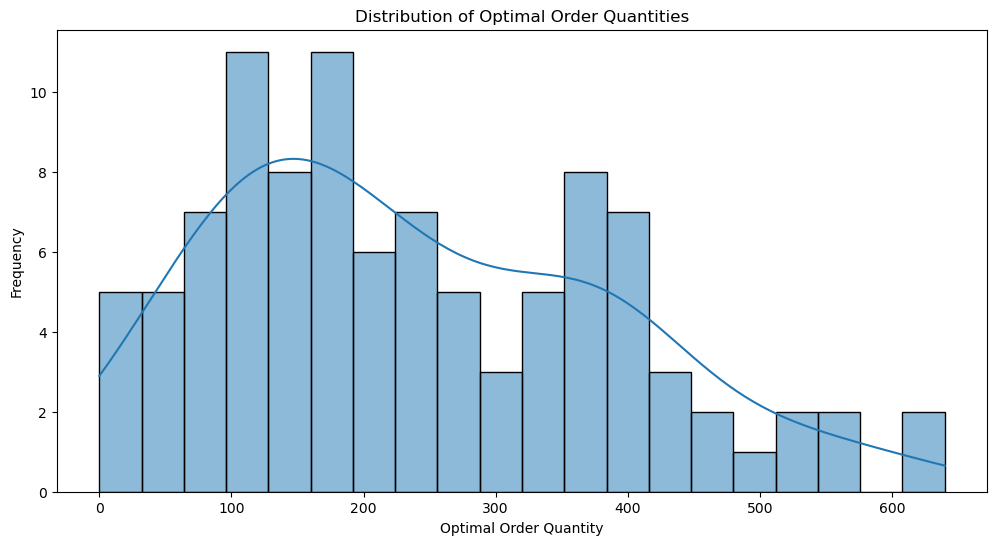

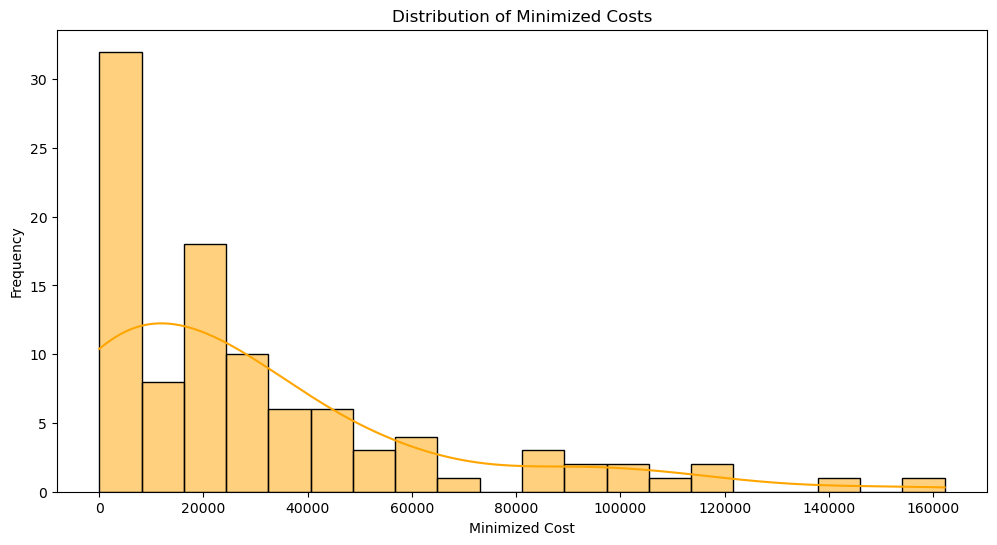

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the optimal order quantities for different products
plt.figure(figsize=(12, 6))
sns.histplot(df_inventory["Optimal_Order_Quantity"], bins=20, kde=True)
plt.title("Distribution of Optimal Order Quantities")
plt.xlabel("Optimal Order Quantity")
plt.ylabel("Frequency")
plt.show()

# Plot the minimized costs for different products
plt.figure(figsize=(12, 6))
sns.histplot(df_inventory["Minimized_Cost"], bins=20, kde=True, color="orange")
plt.title("Distribution of Minimized Costs")
plt.xlabel("Minimized Cost")
plt.ylabel("Frequency")
plt.show()
